
# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### <a id='intro'></a>
## Introduction

### Dataset Description 

> ### Context:
The data is collected about patients who took an appoinment with the hospital/doctor and if they showed up for the appoinment or not.
>
> ### columns descriptions:
* PatientId : The id of the patient -> __Number__
* AppointmentID : the id of the appoinment -> __Number__
* Gender : "M" for male, "F" for females. Note: Females have heigher propotion that Males -> __String__
* ScheduledDay : The day when the patient called or registerd an appoinment -> __Date__
* AppointmentDay : The actuall day of the appoinment -> __Date__
* Age : The Age of the patient -> __Number__
* Neighbourhood : The location of the appoinment -> __String__
* Scholarship : If the patient is part of the poverty elemenation program -> __Boolean__
* Hipertension : If the patient has hipertension or not -> __Boolean__
* Diabetes : If the patient has diabetes or not -> __Boolean__
* Alcoholism : If the patient has alcoholism or not -> __Boolean__
* Handcap : If the patient is handcaped or not -> __Boolean__
* SMS_received : The number of SMS massages received -> __Number__
* No-show : True if the petient did not show, False if he/she showed for the appointment -> __Boolean__

___Can we find patterns that indecates that the patient might not show for the appoinment ?___




### Question(s) for Analysis
>__Q1__: How many appoinments does a patient book on average ?
>
>__Q2__: Does the number of appoinments affect the showing rate ?
>
>__Q3__: How much is the difference between the number of female patient compared to males ?
>
>__Q4__: How does the gender affect the showing rate ?
>
>__Q5__: What is the average waiting time between the schedule day and the appoinment day ?
>
>__Q6__: How much age affect the showing rate ?
>
>__Q7__: Does people with scholerships make appoinments more often ? What is the percentage ? Does it affect the showing rate ?
>
>__Q8__: How many chronic conditions of a patient affect the showing rate ?
>
>__Q9__: does beign handicapped  affect the showing rate ?
>
>__Q10__: How much does SMS massages p affect the showing rate ?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### I HAD AN ISSUE WHILE USING "df.head()" FUNCTION WITH PANDAS VERSION "0.25.5" SO I USED THE ORIGINAL VERSION WITHOUT UPDATING IT.



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> * __Explore Data Architecture__
> * Explore Data Types
> * Explore Duplicate
> * Explore Quatative Data
>  1. Explore Age Feature
>  2. Explore Handcap Feature
>  3. Explore Dates of Appointment ad Scheduling
> * Explore Null Values


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
print("The Data Have " + str(df.shape[0])+ " Samples and "+str(df.shape[1]) +" Features")
df.head(3)

The Data Have 110527 Samples and 14 Features


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


## Data Wrangling

> * Explore Data Architectur
> * __Explore Data Types__
> * Explore Duplicate
> * Explore Quatative Data
>  1. Explore Age Feature
>  2. Explore Handcap Feature
>  3. Explore Dates of Appointment ad Scheduling
> * Explore Null Values


In [3]:
# Exploring the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**Conclusion**:
> * The __"ScheduledDay" and the "AppointmentDay"__ needs to by converted to dates
> 
> * The Names of the __columns needs to by lower case and replace the '-' character in "no-show"__ columns for easier recalling  
>
> * columns __["scholarship","Hipertension","Diabetes","Alcoholism","Handcap","No-show"]__ needs to be converted to booleans 

## Data Wrangling

> * Explore Data Architectur
> * Explore Data Types
> * __Explore Duplicate__
> * Explore Quatative Data
>  1. Explore Age Feature
>  2. Explore Handcap Feature
>  3. Explore Dates of Appointment ad Scheduling
> * Explore Null Values


In [4]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

**Conclusion**:

> * No duplicates presented in the data

## Data Wrangling

> * Explore Data Architectur
> * Explore Data Types
> * Explore Duplicate
> * __Explore Quatative Data__
>  1. Explore Age Feature
>  2. Explore Handcap Feature
>  3. Explore Dates of Appointment ad Scheduling
> * Explore Null Values


In [5]:
# Checking the data consistencey quatative data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Conclusion**:
> * The __Age__ feature need more exploring to understand the apnormal values of **115, -1**, and __0__ ages 
> 
> * The __Handcap__ feature is supposed to be boolean feature, but a value of **4** is included further investgation required 
> * The __SMS_received__ columns is ranging just between **0** and __1__ it would be better to just convert it to boolean type

## Data Wrangling

> * Explore Data Architectur
> * Explore Data Types
> * Explore Duplicate
> * Explore Quatative Data
>  1. __Explore Age Feature__
>  2. Explore Handcap Feature
>  3. Explore Dates of Appointment ad Scheduling
> * Explore Null Values


In [6]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
df.query("Age == 0").head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


In [9]:
df.query("Age >= 100")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


**Conclusion on the age  investigation**:
> * The Age of -1 have on record most likely wrong data __The entire row will be dropped__
>
> * The Age of **[ 0 ]** has unknown meaning, a good approach will be to ask the data owner or the project maneger about what an age of __[ 0 ]__ means for now I will assume that it means new borns younger than 1 years old
>
> * The large Ages of **[ 100 ]** and above is within the normal range as they are as little as to be expected

## Data Wrangling

> * Explore Data Architectur
> * Explore Data Types
> * Explore Duplicate
> * Explore Quatative Data
>  1. Explore Age Feature
>  2. __Explore Handcap Feature__
>  3. Explore Dates of Appointment ad Scheduling
> * Explore Null Values


In [8]:
df["Handcap"].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

**Conclusion on Handcap investigation**
> * there is values rather that __0's__ and **1's** recorded which is strange since as delivered in the data document the __Handcap__ columns is supposed to be True and False values
> Again a better approach was to e-mail the data owner or project maneger on the issue, but I will assume for now that all the other records will be **1's** in the data, needs to be casted to __1__

## Data Wrangling

> * Explore Data Architecture 
> * Explore Data Types
> * Explore Duplicate
> * Explore Quatative Data
>  1. Explore Age Feature
>  2. Explore Handcap Feature
>  3. __Explore Dates of Appointment ad Scheduling__
> * Explore Null Values


In [14]:
# Checking the data consistencey qualitative data
def convert_datetime(feature):
    return pd.to_datetime(df[feature])

df["ScheduledDay"] = convert_datetime("ScheduledDay")
df["AppointmentDay"] = convert_datetime("AppointmentDay")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# The AppointmentDay dosn't record the time hh:mm:ss part, so the time part will be dropped from the ScheduledDay  
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"].dt.date)
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"].dt.date)
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [11]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [17]:
# Checking if the appointment day is always in same day or after the schedule day
(df["AppointmentDay"] < df["ScheduledDay"]).sum()

np.int64(5)

In [18]:
df[df["AppointmentDay"] < df["ScheduledDay"]]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


***Conclusion***:
> * There is __5__ rows that have the appointment date earlier than the schedule date.  
further more all of them **did not show** on appointments most likely due to the error in the date entry of the appointment date.  
The rows need to be dropped

## Data Wrangling

> * Explore Data Architectur
> * Explore Data Types
> * Explore Duplicate
> * Explore Quatative Data
>  1. Explore Age Feature
>  2. Explore Handcap Feature
>  3. Explore Dates of Appointment ad Scheduling
> * __Explore Null Values__


In [19]:
# Finally Checking for any null values in the data 
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Conclusion**:  No Null values in the data set.


### Data Cleaning
> 1. Convert __["ScheduledDay", "AppointmentDay"]__ to date time ------> **[Done]**
> 
> 2. Convert __["scholarship","Hipertension","Diabetes","Alcoholism","Handcap","No-show","SMS_received"]__ to booleans
>  
> 3. Drop The rows where the __["AppointmentDay"]__ is earlier than the **["ScheduledDay"]** 
>
> 4. Drop the row where the __["Age"]__ is equal to **-1**
>
> 5. Change The names of the columns to lower case and seperated with __" _ "__ character

In [20]:
# Create a new DataFrame to keep the original data the same.
df_clean = df.copy()

In [21]:
cols = ["Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
df_clean[cols] = df_clean[cols].astype(bool)
df_clean["No-show"] = np.where(df_clean["No-show"] == "Yes", True, False)

In [22]:
# Drop The rows where the ["AppointmentDay"] is earlier than the ["ScheduledDay"]
df_clean.drop(df_clean[(df_clean["AppointmentDay"] < df_clean["ScheduledDay"]) == True].index, inplace=True, axis=0)
(df_clean["AppointmentDay"] < df_clean["ScheduledDay"]).any()

np.False_

In [23]:
# Drop the row where the ["Age"] is equal to -1
df_clean.drop(df_clean[df_clean["Age"] == -1].index, inplace=True, axis=0)
df_clean[df_clean["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [24]:
# Change The names of the columns to lower case and seperated with " - " character
df_clean = df_clean.rename(columns=lambda x:x.lower().strip().replace("-","_"))
df_clean.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 How many appoinments does a patient book on average ?

In [32]:
#Make number_of_appointment columns to count the number of times a patient makes an appointment.
number_of_appointment = df_clean.groupby(by=["patientid"], as_index=False).count()[["patientid", "appointmentid"]]
number_of_appointment = pd.DataFrame(number_of_appointment)
number_of_appointment = number_of_appointment.rename(columns={"appointmentid" : "number_of_appointment"})
df_clean = df_clean.merge(number_of_appointment)
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_appointment
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,2


<Axes: ylabel='number_of_appointment'>

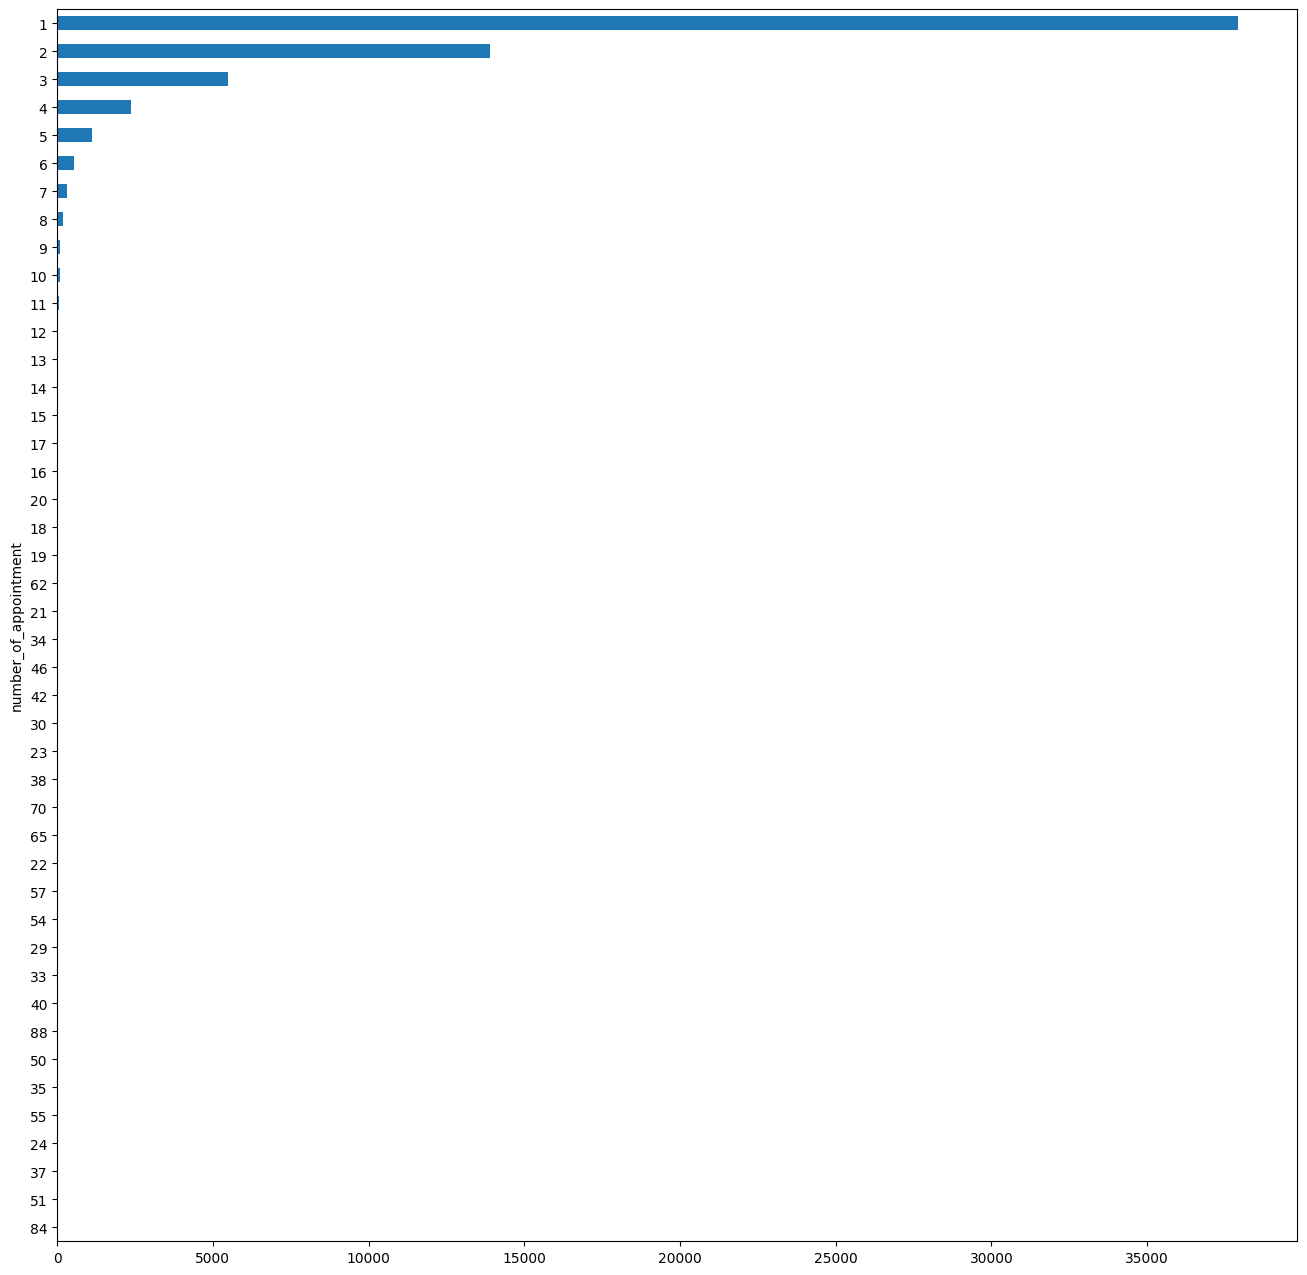

In [35]:
# We can't get the average number of appointments of the main data becuase there are multiple entries for every redundant patient
number_of_appointment.set_index("patientid")
number_of_appointment["number_of_appointment"].value_counts(ascending=True).plot(kind="barh", figsize=(16,16))

In [27]:
number_of_appointment["number_of_appointment"].describe()

count    62298.00000
mean         1.77407
std          1.77023
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max         88.00000
Name: number_of_appointment, dtype: float64

### looks like there are people with large amount of appointments a better approach will be to aggregate them all into one catagory other than 1, 2, 3, 4 number of appointments. 

In [37]:
#Replace the values of more than 4 appoinments with a value of 5
number_of_appointment["number_of_appointment"] = np.where(number_of_appointment["number_of_appointment"] > 4, 5, number_of_appointment["number_of_appointment"])

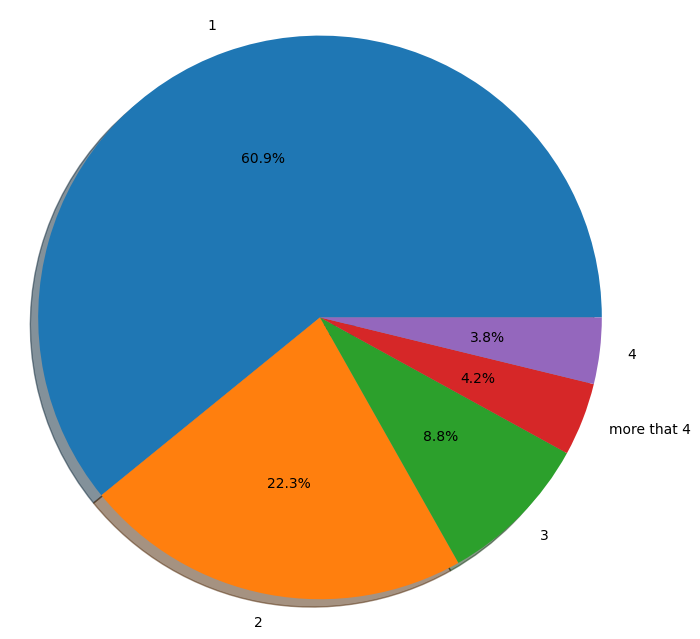

In [29]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.pie(
    x = number_of_appointment["number_of_appointment"].value_counts(),
    autopct='%1.1f%%',
    labels=["1", "2", "3", "more that 4", "4"],
    shadow=True,
);
ax.axis('equal')
plt.show()

**Conclusion**:
* Looks like The number of appointments range from 1 appointment to 4 appointments with rare occurences of people with more than 4 appointments

* about 61% of the patients make just one appoinment with a mean of 1.7 appointments and median of 1 appointment.

### Research Question 2  Does the number of appoinments affect the showing rate ?

In [41]:
# Merging the no_show columns to examine if the number of appointments affect the show rate
number_of_appointment = number_of_appointment.merge(df_clean[["patientid", "no_show"]].groupby(by="patientid", as_index=False).sum(), how="inner")
number_of_appointment.shape

(62298, 3)

In [43]:
# Convert the no_show no bool again after the data type was changed during the groupby function while merging above.
number_of_appointment["no_show"] = number_of_appointment.no_show.astype(bool);

In [48]:
number_of_appointment

,patientid,number_of_appointment,no_show
0,3.921784e+04,1,False
1,4.374176e+04,1,False
2,9.377953e+04,1,False
3,1.417242e+05,1,False
4,5.376153e+05,1,False
...,...,...,...
62293,9.999320e+14,5,False
62294,9.999350e+14,1,False
62295,9.999465e+14,1,False
62296,9.999686e+14,1,False


In [50]:
aggr_df = number_of_appointment.groupby(["number_of_appointment", "no_show"], as_index=False).count()
aggr_df

,number_of_appointment,no_show,patientid
0,1,False,30801
1,1,True,7119
2,2,False,8980
3,2,True,4915
4,3,False,2968
5,3,True,2531
6,4,False,1038
7,4,True,1331
8,5,False,850
9,5,True,1765


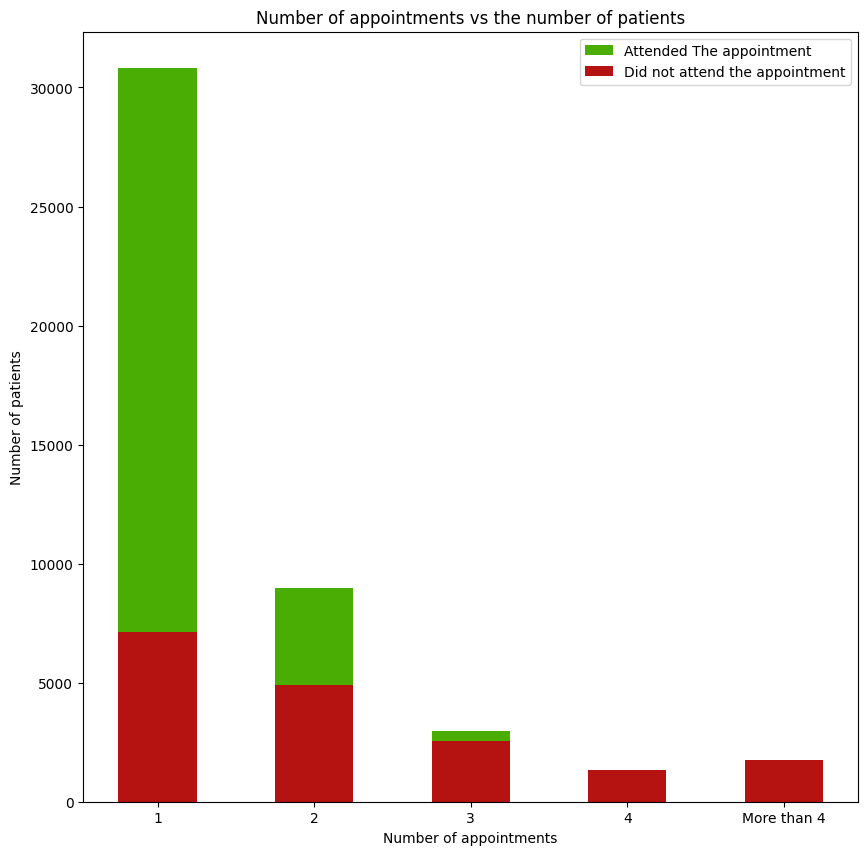

In [53]:
# plotting the number_of_appointment vs the no_show with stacked columns.
fig, ax = plt.subplots(1, figsize=(10, 10))

ax.bar(
    x = np.arange(1, 6),
    height = aggr_df[aggr_df["no_show"] == False]["patientid"],
    color=["#4aad03"],
    width=0.5,
    tick_label= ["1", "2", "3", "4", "More than 4"]
);
ax.bar(
    x = np.arange(1, 6),
    height = aggr_df[aggr_df["no_show"] == True]["patientid"],
    color=["#b51212"],
    width=0.5,
    tick_label= ["1", "2", "3", "4", "More than 4"]
);
ax.legend(["Attended The appointment","Did not attend the appointment"])
ax.set_xlabel("Number of appointments")
ax.set_ylabel("Number of patients")
ax.set_title("Number of appointments vs the number of patients")
plt.show()

**Conclusion**:
The chance that some one will show up for an appointment decreases the more number of previous appointments.
most likely this is because the more appoinments the patients have the more likely they feel better with the use of medications and treatments.

**TODO** : we need to drop the redundant patients to have a more accurate analysis on the gender of the patients.

In [54]:
# Dropping the duplicated patients
no_duplicate_df = df_clean.drop_duplicates("patientid")
no_duplicate_df.shape

(62298, 15)

### Research Question 3  How much is the difference between the number of female patient compared to males ?

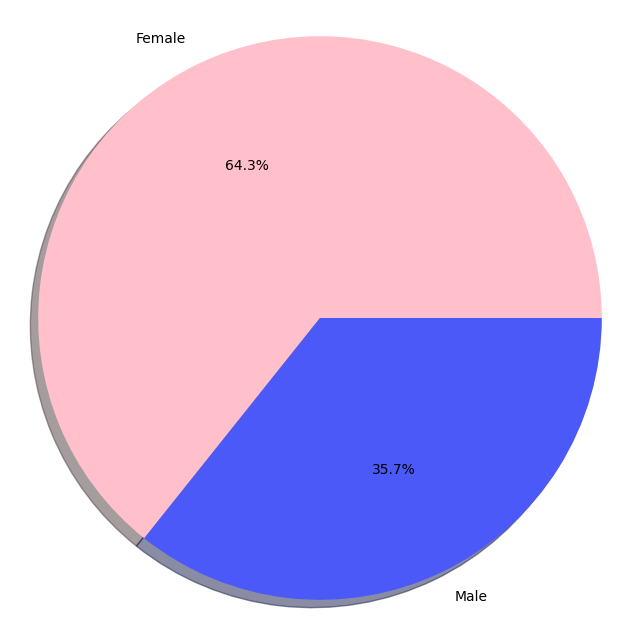

In [55]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.pie(
    x = no_duplicate_df.groupby(["gender"]).count()["no_show"],
    autopct='%1.1f%%',
    labels=["Female", "Male"],
    shadow=True,
    colors=["pink","#4a59f7"]
);
ax.axis('equal')
plt.show()

**Conclusion**: Females makes __64.3%__ of the whole data set, Females are more likely to to take care of their health.

### Research Question 4  How does the gender affect the showing rate ?

In [56]:
# aggregate the gender and the no_show columns by the count and use any columns as a counter
aggr_df = no_duplicate_df.groupby(["gender", "no_show"], as_index=False).count()[["gender", "no_show","age"]]

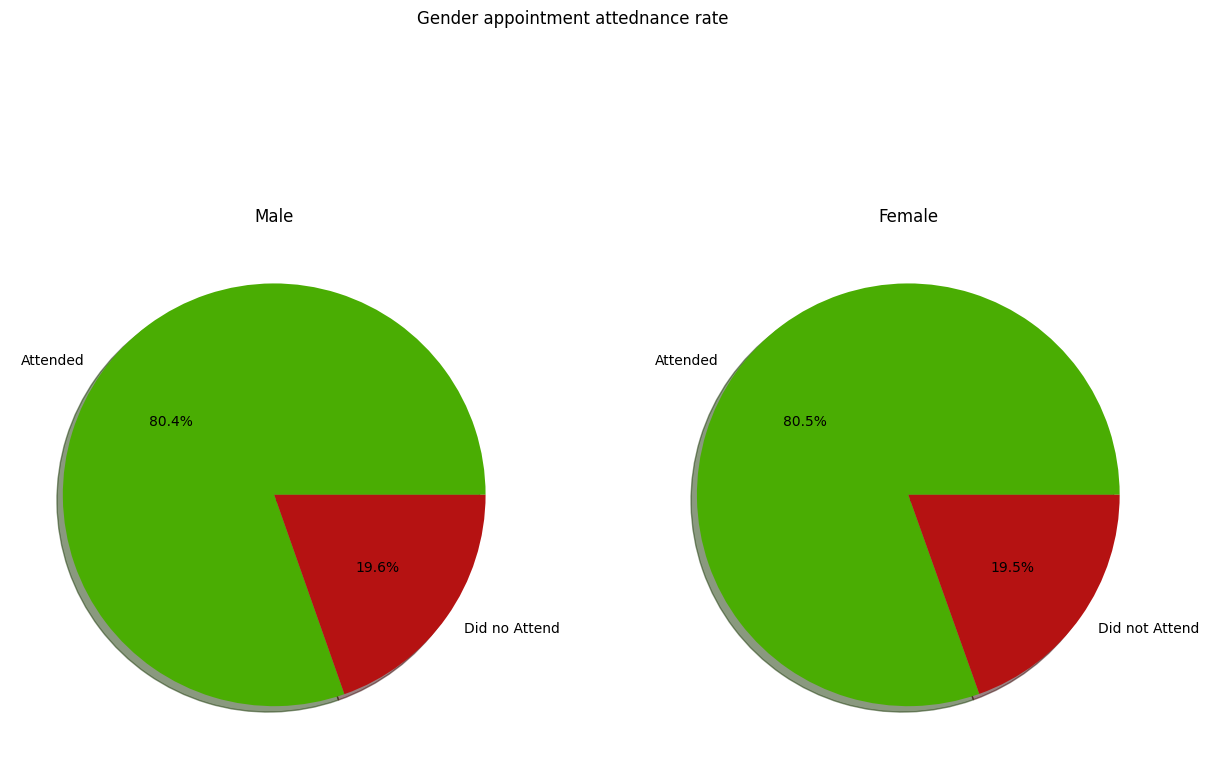

In [57]:
# plot the data using grouped columns
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Gender appointment attednance rate")
ax[0].pie(
    x = aggr_df[aggr_df["gender"] == "M"]["age"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[0].set_title("Male");

ax[1].pie(
    x = aggr_df[aggr_df["gender"] == "F"]["age"],
    autopct='%1.1f%%',
    labels=["Attended", "Did not Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[1].set_title("Female");

**Conclusion** : The Gender of the patient doesn't affect the showing rate, even thou that femals tends to make more appointments, maybe because men don't ask for an appoinment untill their condition gets realy bad

### Research Question 5  What is the average waiting time between the schedule day and the appoinment day ?

count                        110521
mean     10 days 04:25:27.412889858
std      15 days 06:07:25.262183605
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: waiting_time, dtype: object


<Axes: ylabel='Frequency'>

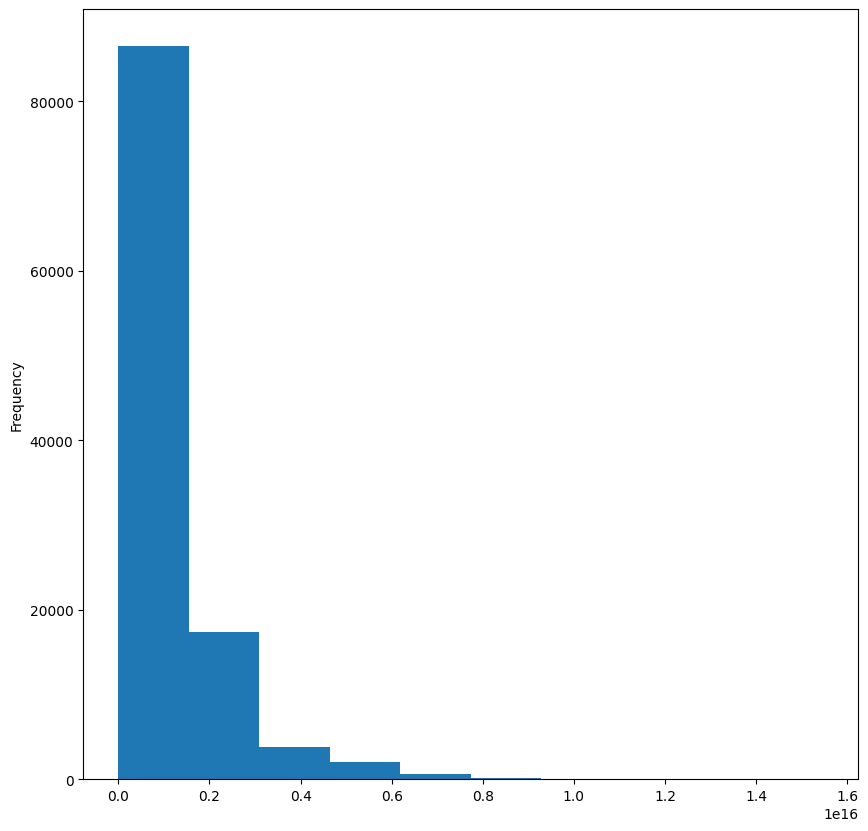

In [58]:
df_appointments = df_clean.copy()
df_appointments["waiting_time"] = (df_appointments["appointmentday"] - df_appointments["scheduledday"])
print(df_appointments["waiting_time"].describe())
df_appointments["waiting_time"].astype(int).plot(kind="hist", figsize=(10,10))

**Conclusion** : there is patients with a large amount of waiting days up to 179 days, the graph is much skewed to the right, with a mean of 10 days that is shifted because of the very large number of waiting days, and a median of 4 days, and most of the pateints get an appointments in the same day.

A further investigation needs to be done in order to see if the number of waiting days affect the showing rate, or maybe the weekends and holidays also affect the showing rate for the appointments.

### Research Question 6  How much age affect the showing rate ?

<Axes: ylabel='Frequency'>

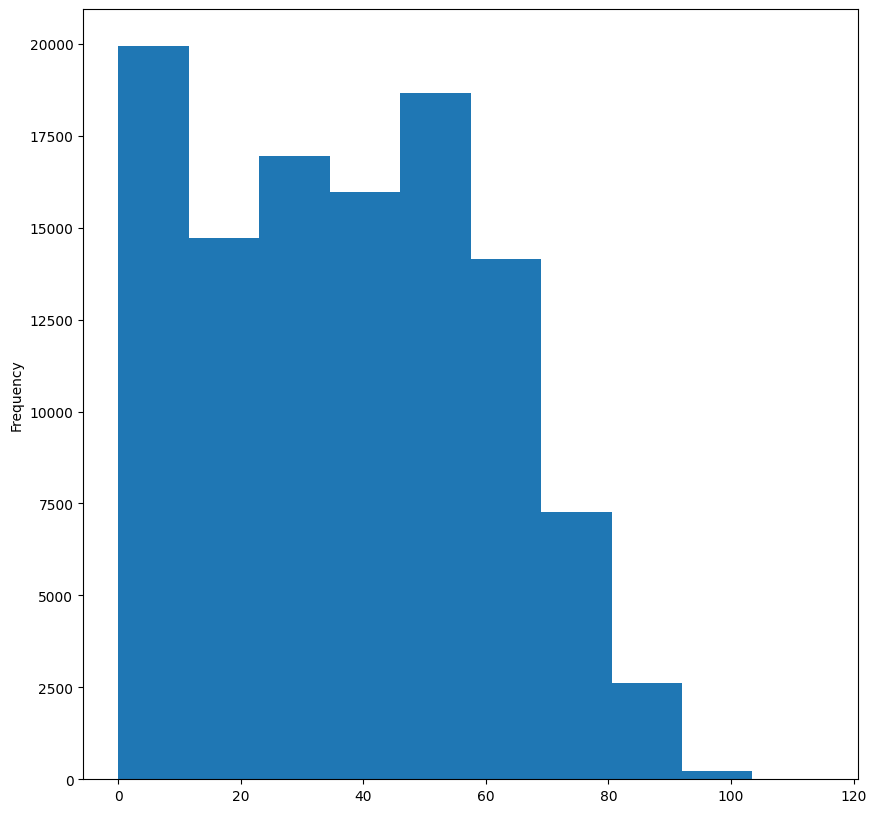

In [59]:
df_clean["age"].plot(kind="hist", figsize=(10,10))

**Conclusion**: unsurprisingly the young children under the age of 10 makes the most of the data, as their parents and care takers usualy takes a good care of the children, the number drops with the age getting older, untill the age of 50, then the number gettes heigher again as old people of age 50 to 60 tends to take good care of their health, and probably they even got kids or care takers make their schedule their appointments, or maybe they have illnesses that require periodical checks, finally the number of pateints drops significatlly after the age of 60, most likely because less pateints after the age of 60 are in the dataset, or they have a personal doctors as they can't move to the hospital to get the prober treatments.  

In [60]:
# We will divide the age into 7 cataogories in order to analyis them:
# [0, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [older than 60].

df_age = df_clean.copy()
df_age["age"] = pd.cut(df_age["age"],
                       bins=[0, 10, 20, 30, 40, 50, 60, df_age["age"].max()],
                       labels=["0 to 10", "10 to 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "more than 60"],
                      right=True,
                      include_lowest=True)

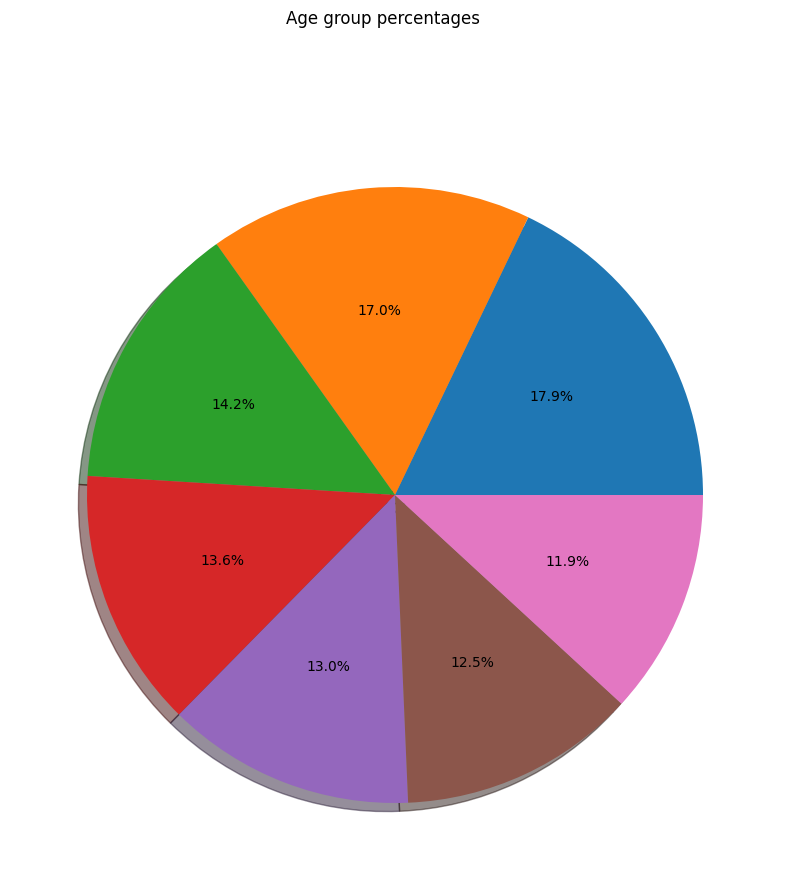

In [61]:
# plotting the values of the age and see 
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle("Age group percentages")
ax.pie(
    x = df_age["age"].value_counts(),
    autopct='%1.1f%%',
    shadow=True
);

**Conclusion** : looks like all the age groupe are nearly equal thoughout the dataset.

In [62]:
aggr_df = df_age.groupby(["age", "no_show"], as_index=False).count()

C:\Users\moham\AppData\Local\Temp\ipykernel_36120\1094184522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggr_df = df_age.groupby(["age", "no_show"], as_index=False).count()


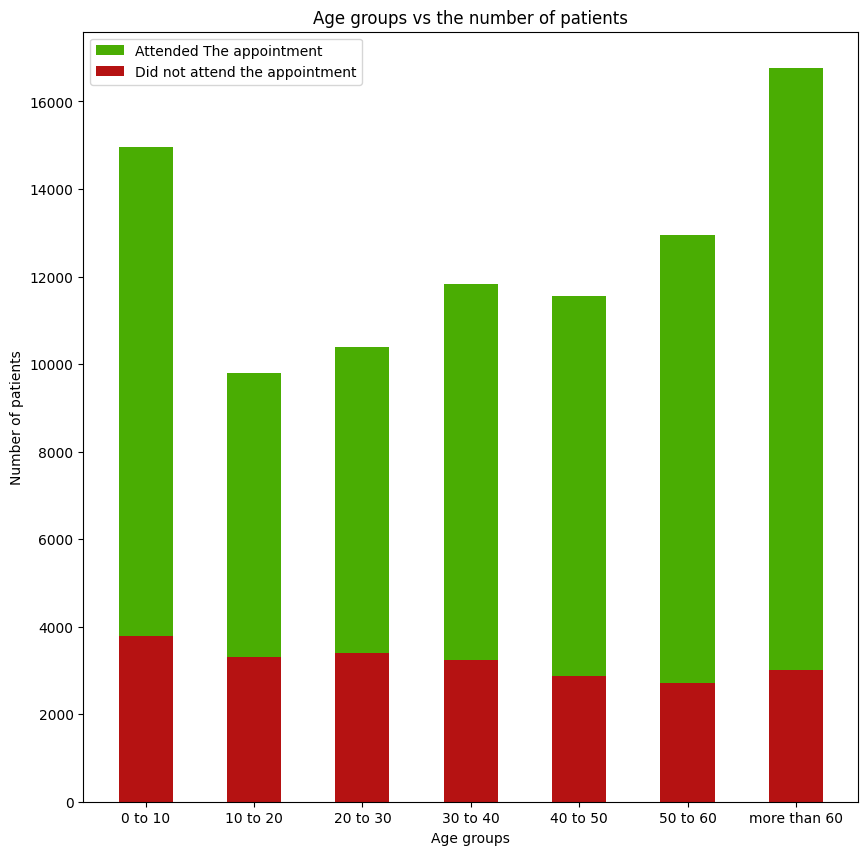

In [64]:
# plotting the Age group vs the no_show with stacked columns.
fig, ax = plt.subplots(1, figsize=(10, 10))

ax.bar(
    x = np.arange(1, 8),
    height = aggr_df[aggr_df["no_show"] == False]["patientid"],
    color=["#4aad03"],
    width=0.5,
    tick_label= ["0 to 10", "10 to 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "more than 60"]
);
ax.bar(
    x = np.arange(1, 8),
    height = aggr_df[aggr_df["no_show"] == True]["patientid"],
    color=["#b51212"],
    width=0.5,
    tick_label= ["0 to 10", "10 to 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "more than 60"]
);
ax.legend(["Attended The appointment","Did not attend the appointment"])
ax.set_xlabel("Age groups")
ax.set_ylabel("Number of patients")
ax.set_title("Age groups vs the number of patients")
plt.show()

**Conclusion** : The age doesn't affect the show rate that much, thee red bars are about the same height,
but a further investigations is needed to analyis if old people with care takers tends to show more often, also if the old age illnesses affect the showing rate.

### Research Question 7  Does people with scholerships make appoinments more often 

In [66]:
# again with scholarship we need to make sure that the pateints are treated uniquely to ensure the analysis' accuracy
df_scholar = df_clean.copy()
df_scholar = df_clean[["patientid", "scholarship", "no_show"]].groupby(by="patientid", as_index=False).sum()
df_scholar[["scholarship", "no_show"]] = df_scholar[["scholarship", "no_show"]].astype(bool)
df_scholar.shape

(62298, 3)

In [67]:
df_scholar.head(1)

,patientid,scholarship,no_show
0,39217.84439,False,False


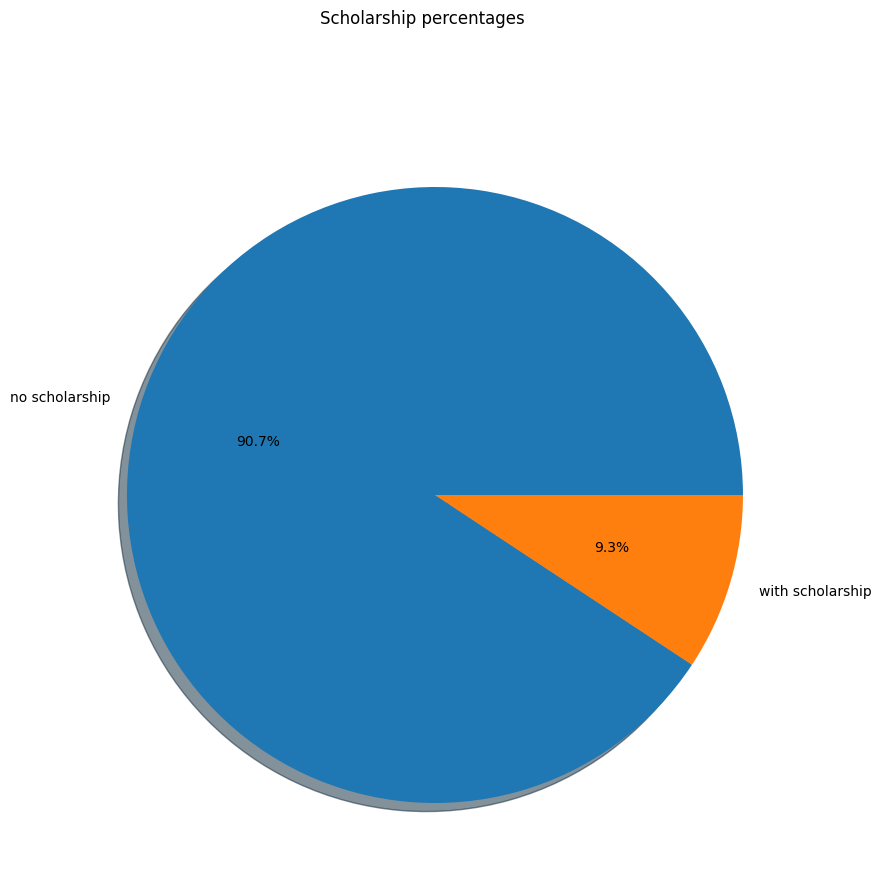

In [68]:
# plotting the values of the age and see 
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle("Scholarship percentages")
ax.pie(
    x = df_scholar["scholarship"].value_counts(),
    autopct='%1.1f%%',
    shadow=True,
    labels=["no scholarship", "with scholarship"]
);

In [69]:
aggr_df = df_age.groupby(["scholarship", "no_show"], as_index=False).count()
aggr_df[["scholarship", "no_show", "patientid"]]

,scholarship,no_show,patientid
0,False,False,79924
1,False,True,19736
2,True,False,8283
3,True,True,2578


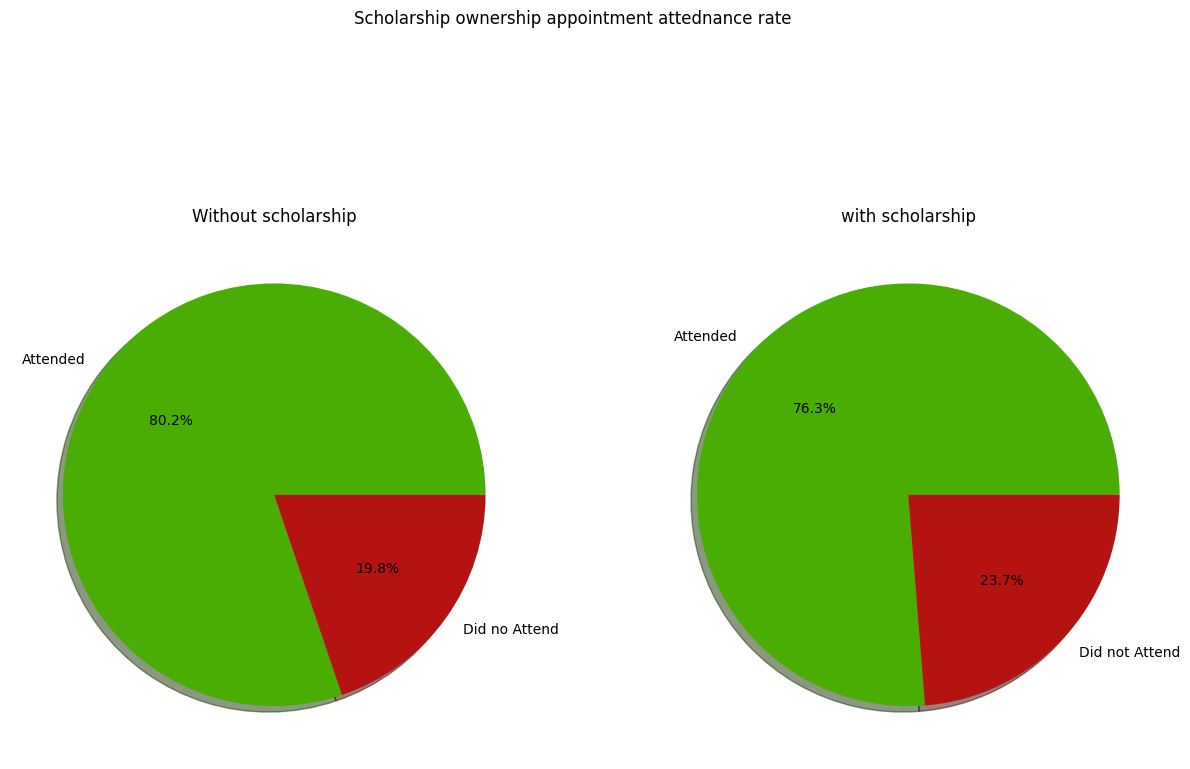

In [70]:
# plot the data using grouped columns
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Scholarship ownership appointment attednance rate")
ax[0].pie(
    x = aggr_df[aggr_df["scholarship"] == False]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[0].set_title("Without scholarship");

ax[1].pie(
    x = aggr_df[aggr_df["scholarship"] == True]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did not Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[1].set_title("with scholarship");

**Conclusion** : Patients without scholarships tends to show more than the people without scholarships, this is most likely linked to another reseaon, maybe the people with scholarships are in better envionmental conditions, with access to clean food and drinks, further investigations and data is required.

In [71]:
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_appointment
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,2


### Research Question 8  How many chronic conditions of a patient affect the showing rate ?

In [72]:
#first we add all the columns related to permenant health issues into one columns to see if the more health problems a patient
#have the more is he likely to show for the appoinment.

df_clean["no_of_medical_conditions"] = df_clean[["hipertension", "diabetes", "alcoholism"]].sum(axis=1)
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_appointment,no_of_medical_conditions
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,2,1


In [73]:
x = df_clean["no_of_medical_conditions"].value_counts(),
x

(no_of_medical_conditions
 0    85306
 1    17582
 2     7377
 3      256
 Name: count, dtype: int64,)

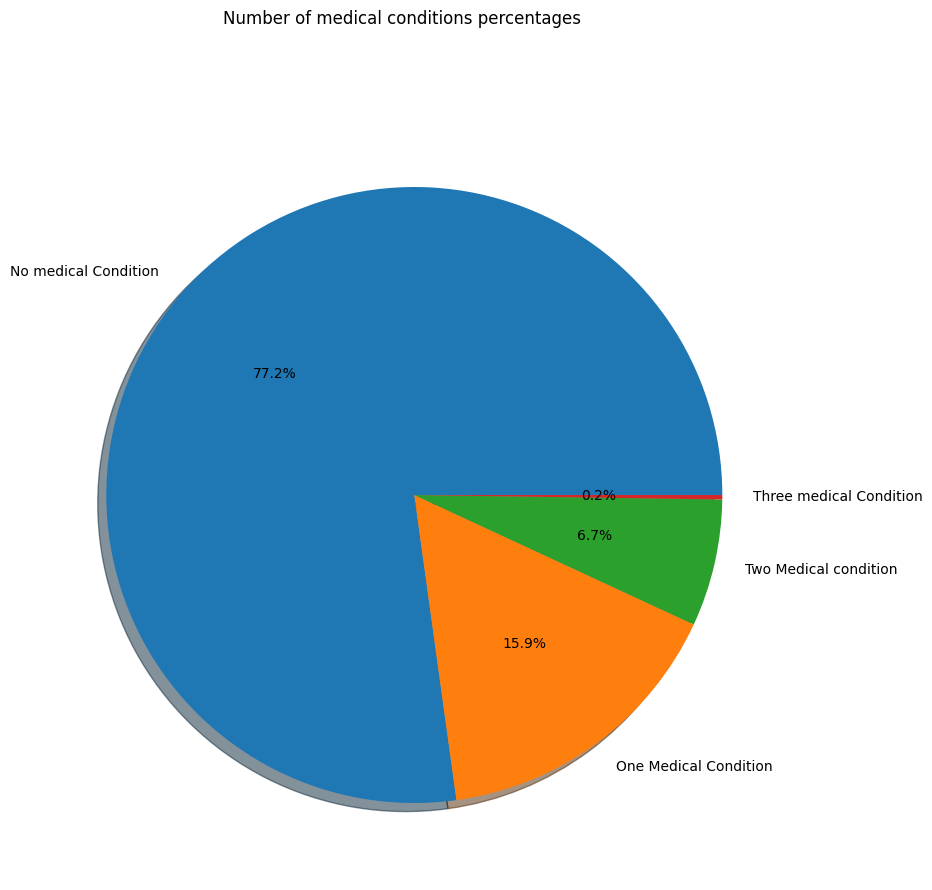

In [74]:
# plotting the values of the Number of Medical Conditions
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle("Number of medical conditions percentages")
ax.pie(
    x = df_clean["no_of_medical_conditions"].value_counts(),
    autopct='%1.1f%%',
    shadow=True,
    labels=["No medical Condition", "One Medical Condition", "Two Medical condition", "Three medical Condition"]
);

**Conclusion*** : More the 3/4 of the patients does not have hipertension, diabetes, or alcoholism

In [75]:
aggr_df = df_clean.groupby(by=["no_of_medical_conditions", "no_show"], as_index=False).count()[["patientid", "no_of_medical_conditions", "no_show"]]
aggr_df

,patientid,no_of_medical_conditions,no_show
0,67473,0,False
1,17833,0,True
2,14453,1,False
3,3129,1,True
4,6071,2,False
5,1306,2,True
6,210,3,False
7,46,3,True


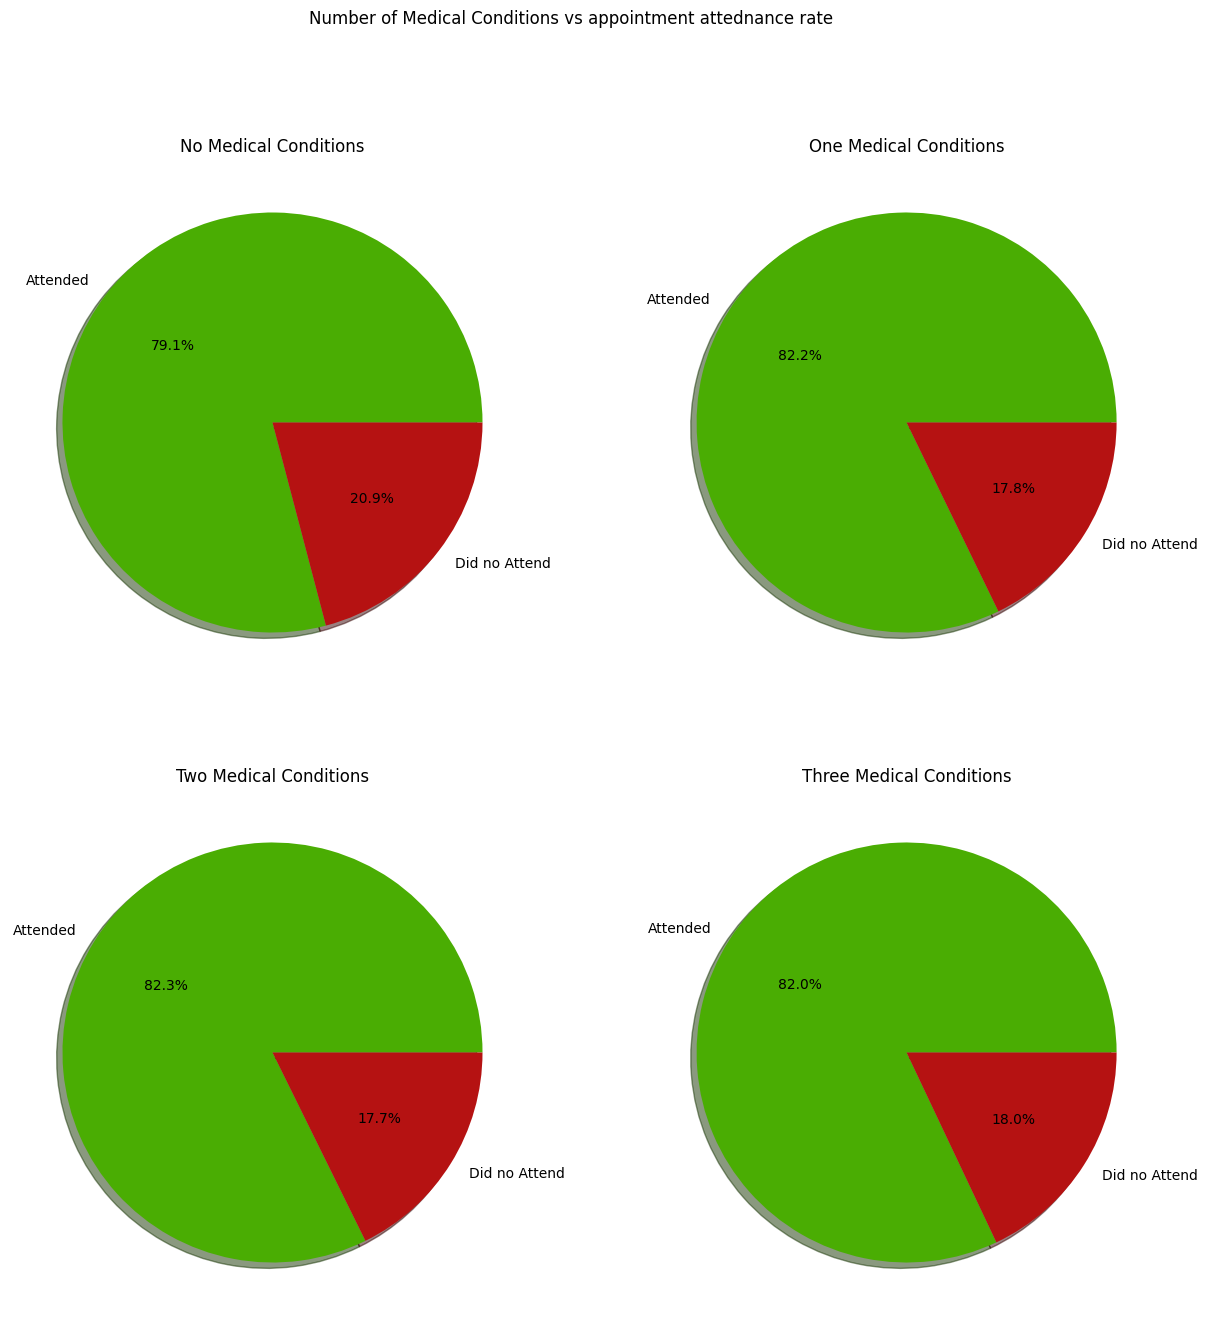

In [76]:
# Plotting the number of medical condition against the showing rate
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle("Number of Medical Conditions vs appointment attednance rate")
ax[0, 0].pie(
    x = aggr_df[aggr_df["no_of_medical_conditions"] == False]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[0, 0].set_title("No Medical Conditions");

ax[0, 1].pie(
    x = aggr_df[aggr_df["no_of_medical_conditions"] == 1]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[0, 1].set_title("One Medical Conditions");

ax[1, 0].pie(
    x = aggr_df[aggr_df["no_of_medical_conditions"] == 2]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[1, 0].set_title("Two Medical Conditions");

ax[1, 1].pie(
    x = aggr_df[aggr_df["no_of_medical_conditions"] == 3]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[1, 1].set_title("Three Medical Conditions");

**Conclusion**: looks like the number of medical conditions doesn't differ that much, but patients with no medical condition have a slightly heigher chance to not show for the appointment, maybe this is because the patients with medical conditions make periodical checks.

The 3 features of hipertension, diabetes, or alcoholism can be compined into one feature to indicate if the patient have a chronic medical conditions or not to make the analysis or the prediction of patient behaviour easier.


### Research Question 9  does beign handicapped  affect the showing rate ?

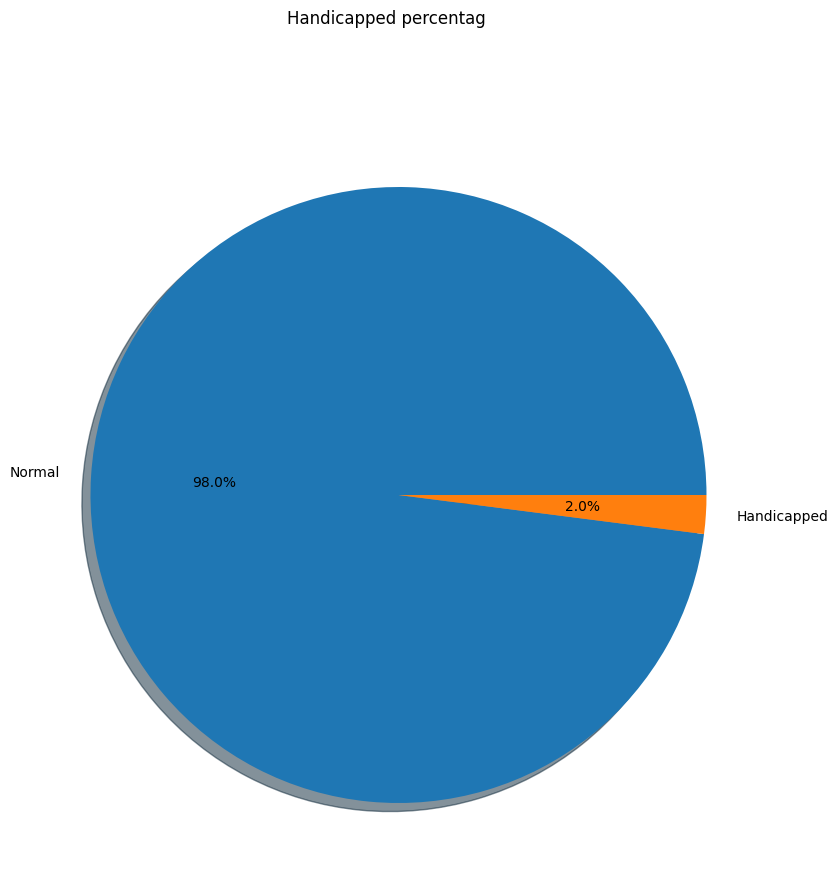

In [77]:
# plotting the values of the Handicapped percentage
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle("Handicapped percentag")
ax.pie(
    x = df_clean["handcap"].value_counts(),
    autopct='%1.1f%%',
    shadow=True,
    labels=["Normal",'Handicapped']
);

**Conclusion** : Most of the patients are not hanicapped

In [78]:
aggr_df = df_clean.groupby(by=["handcap", "no_show"], as_index=False).count()
aggr_df

,handcap,no_show,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,number_of_appointment,no_of_medical_conditions
0,False,False,86373,86373,86373,86373,86373,86373,86373,86373,86373,86373,86373,86373,86373,86373
1,False,True,21909,21909,21909,21909,21909,21909,21909,21909,21909,21909,21909,21909,21909,21909
2,True,False,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834
3,True,True,405,405,405,405,405,405,405,405,405,405,405,405,405,405


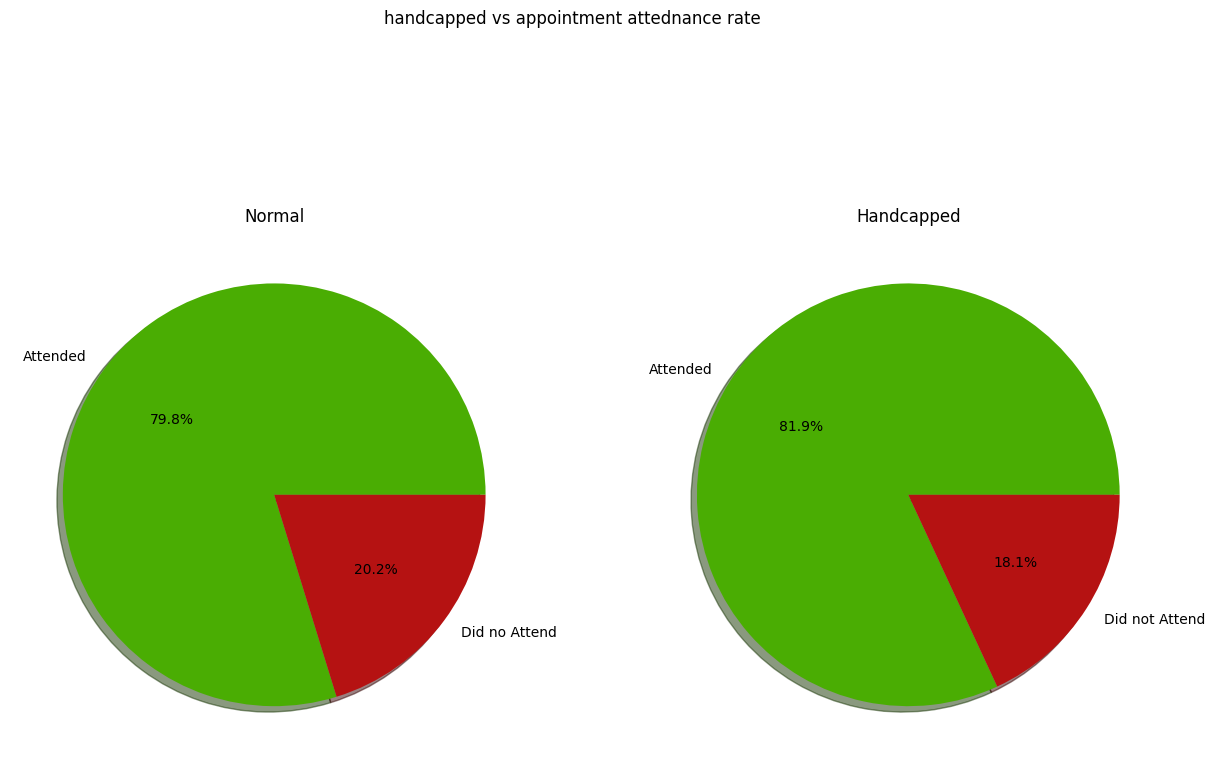

In [79]:
# plot the data using grouped columns
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("handcapped vs appointment attednance rate")
ax[0].pie(
    x = aggr_df[aggr_df["handcap"] == False]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[0].set_title("Normal");

ax[1].pie(
    x = aggr_df[aggr_df["handcap"] == True]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did not Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[1].set_title("Handcapped");

**Conclusion** : handcapped patients tends to show up for the appointment slightly heigher that normal patients, maybe bacause most of handcapped patients have care takers to take them for the appointment, or maybe because of their condition.

In [80]:
df_clean["sms_received"].value_counts()

sms_received
False    75039
True     35482
Name: count, dtype: int64

### Research Question 10  How much does SMS massages affect the showing rate ?

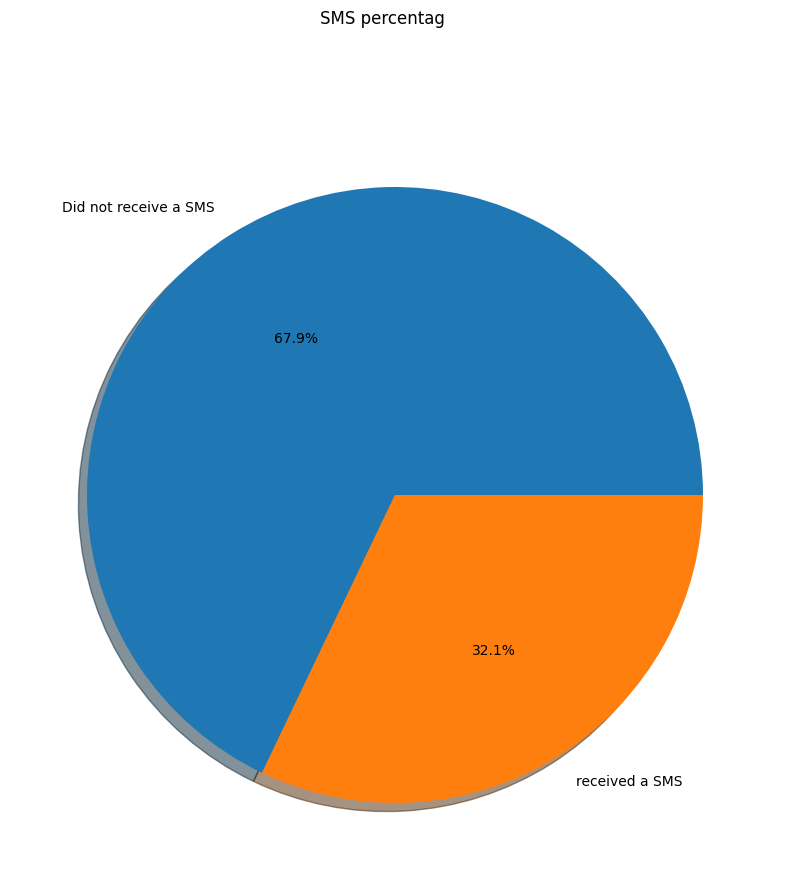

In [81]:
# plotting the values of the SMS sent percentage
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle("SMS percentag")
ax.pie(
    x = df_clean["sms_received"].value_counts(),
    autopct='%1.1f%%',
    shadow=True,
    labels=["Did not receive a SMS",'received a SMS']
);

In [82]:
aggr_df = df_clean.groupby(by=["sms_received", "no_show"], as_index=False).count()
aggr_df

,sms_received,no_show,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,number_of_appointment,no_of_medical_conditions
0,False,False,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509
1,False,True,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530
2,True,False,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698
3,True,True,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784


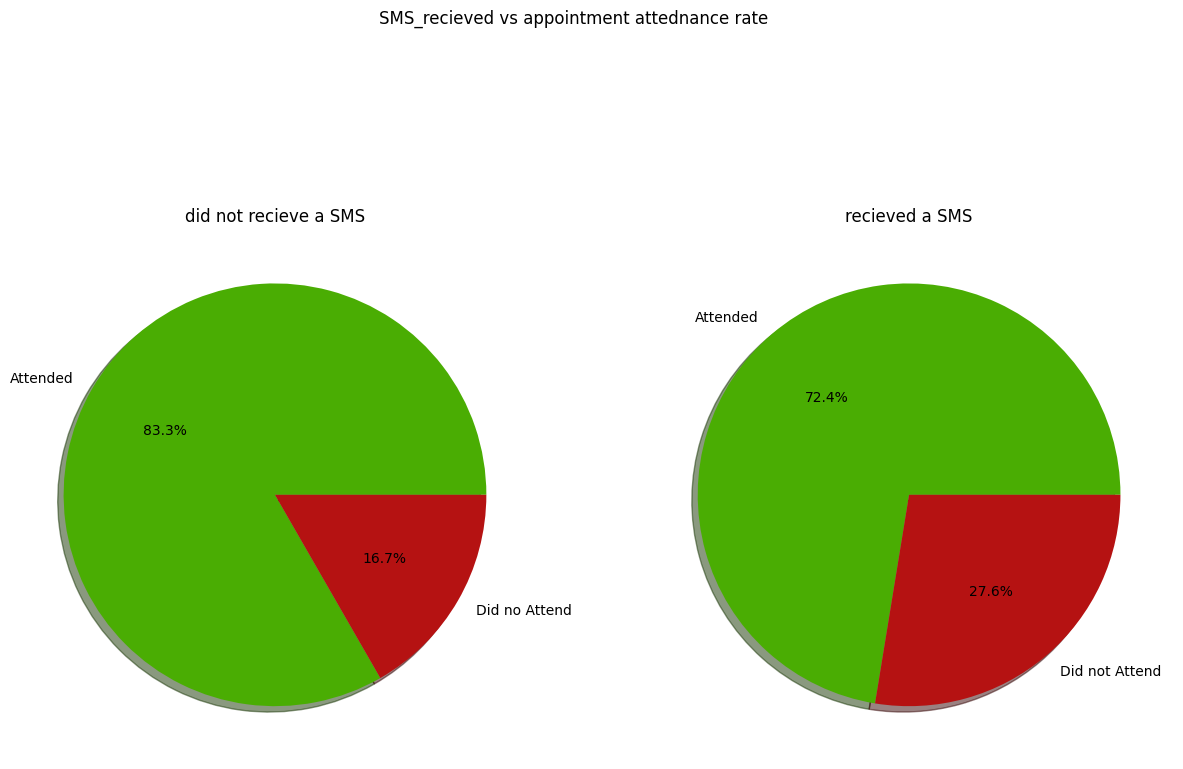

In [83]:
# plot the data using grouped columns
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("SMS_recieved vs appointment attednance rate")
ax[0].pie(
    x = aggr_df[aggr_df["sms_received"] == False]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did no Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[0].set_title("did not recieve a SMS");

ax[1].pie(
    x = aggr_df[aggr_df["sms_received"] == True]["patientid"],
    autopct='%1.1f%%',
    labels=["Attended", "Did not Attend"],
    shadow=True,
    colors=["#4aad03","#b51212"]
);
ax[1].set_title("recieved a SMS");

<a id='conclusions'></a>
## Conclusions

> * The number of appointments range from 1 to 4 appointments with rare occurences of people with more than 4 appointments
>
>
> * about 61% of the patients make just one appoinment with a mean of 1.7 appointments and median of 1 appointment.
>
>
> * The chance that some one will show up for an appointment decreases the more number of previous appointments.
>   most likely this is because the more appoinments the patients have the more likely they feel better with the use of          >   medications and treatments.
>
>
> * Females makes __64.3%__ of the whole data set, Females are more likely to to take care of their health.
>
>
> * The Gender of the patient doesn't affect the showing rate, even thou that femals tends to make more appointments, maybe      >   because men don't ask for an appoinment untill their condition gets realy bad.
>
>
> * More the 3/4 of the patients does not have hipertension, diabetes, or alcoholism
>
>
> * looks like the number of medical conditions doesn't differ that much, but patients with no medical condition have a          >   slightly heigher chance to not show for the appointment, maybe this is because the patients with medical conditions make    >   periodical checks.
>
>
> * he 3 features of hipertension, diabetes, or alcoholism can be compined into one feature to indicate if the patient have a    >   chronic medical conditions or not to make the analysis or the prediction of patient behaviour easier.
>
>
> * Most of the patients are not hanicapped
>
>
> * handcapped patients tends to show up for the appointment slightly heigher that normal patients, maybe bacause most of        >   handcapped patients have care takers to take them for the appointment, or maybe because of their condition.
>
>
> * about 2/3 of the patients doen's recieve a SMS
>
>
> * The percentage of patients showing up after recieving a SMS is lower, maybe this is linked to whom the hospital pick to      >   send a SMS to

## Further Investigation

> * Does the number of appointments change on holidays and weakends ?
>
> * Does the Number of appointments differ if the patients have one or more of the mentioned illnesses ?
>
> * What does the numbers other than 1's and 0's means ?
>
> * Does the patients with scholarships are picked based on a certain critira, maybe they give it to older people rather than    > the young ones.
>
> * Why there is some patients that gets more than 100 days delay between their schedulday and appointmentday ?

## Data Limitation

> The Data is lacking if a patient have a care taker or not, this may have a big impact on the showing probability of the        > patiens, mayber this is why old people of 50 to 60 years old tends to make more appointments, also childer less than 10 years


In [84]:
##from subprocess import call
##call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])